# TP 11 : Espaces vectoriels

Consignes :

- Renommer ce fichier <b>nom1-nom2-TP11</b> , en cliquant sur le titre du fichier "TP 11 : Espaces vectoriels" en haut à gauche



- <center>ATTENTION : </center>
    
  <u>   <center> une première version du TP est à rendre dans le devoir Teams à la fin de la séance. </center> </u>
    
  <u>   <center> Vous avez jusqu'à lundi 4 avril à 23h59 pour rendre une nouvelle version de votre TP.</center> </u>
    
    
    
    
- TP à faire par groupes de 2. Le groupe de travail sera le même pour toute l'année.


  Cliquer deux fois sur la cellule pour completer ci-dessous :

- NOM PRENOM : CACHEUX Nolan
- NOM PRENOM : MERLAUD Thomas



  <u><i> Prenez le temps de réviser les concepts liés aux matrices, vecteurs, systèmes d'équations linéaires, ... des séances de TP précédentes. </i> </u>

# Exercice 1 : Interpolation polynomiale

Considérons le problème suivant: on cherche un polynôme  $P(X)$  à coefficients réels dont le graphe passe par les points

$$ (1,4), \ (2,-1), \ (3,2), \ (4,3), \ (5, 1). $$
 
a) Soit  $V $ l'espace vectoriel des polynômes de degré  $\leq 4$ et $f: V \to \mathbb{R}^5$   l'application linéaire définie par

$$ f(P) = (P(1), P(2), P(3), P(4), P(5)) $$
 
Construire informatiquement une matrice  $A$  représentant  $f$  en calculant tout d'abord  $f(1), \ f(X), \ f(X^2), \ f(X^3), \ f(X^4).$



In [2]:
# a)
# f(1) = [1,1,1,1,1]
# f(X) = [1,2,3,4,5]
# f(X²) = [1,4,9,16,25]
# f(X³) = [1,8,27,64,125]
# f(X⁴) = [1,16,81,256,625]


A = matrix(5,5)
for i in range(5):
    for j in range(5) :
        A[i,j] = (i+1)**j
        
show(A)

[  1   1   1   1   1]
[  1   2   4   8  16]
[  1   3   9  27  81]
[  1   4  16  64 256]
[  1   5  25 125 625]

b) Vérifier la validité de votre matrice  $A$  de la question précédente en l'utilisant pour calculer  $f(Q)$  et $ f(R)$  avec  $Q(X) = X^3 - X + 1$ et $R(X) = 2X^4 - 1$  (et vérifiez que vous obtenez bien les bonnes réponses !).

In [3]:
Q = Matrix([[1],[-1],[0],[1],[0]]) #on prend les coefficients directeurs λ devant chaque X^n pour n variant de 0 à 4
R = Matrix([[-1],[0],[0],[0],[2]])

# f(Q) = [1,7,25,61,121]

# f(R) = [1,31,161,511,1249]

print("Produit de A par Q :")
show(A*Q)
print("Produit de A par R :")
show(A*R)

Produit de A par Q :


[  1]
[  7]
[ 25]
[ 61]
[121]

Produit de A par R :


[   1]
[  31]
[ 161]
[ 511]
[1249]

c) Pour revenir à la question initiale: convainquez-vous que  $f$  est bijective en remarquant que  $A$  est inversible, et déterminez  $f^{-1}(4,-1,2,3,1)$ en utilisant $A^{-1}$.

In [6]:
print("Le determimant de A : ")

show(det(A))

print("Il est différent de 0, donc A est inversible. \n")

print("L'inverse de A : ")
Ainv = A.inverse()
show(Ainv)

print("On a donc f(X) = Y <=> AX = Y <=> A^1 * A * X = A^-1 * Y <=> X = A^-1 * Y <=> X = f^-1(Y)")
Y = Matrix([[4],[-1],[2],[3],[1]])
print("\nAinsi, f^−1(4,−1,2,3,1) : ")
show(Ainv*Y)

Le determimant de A : 


288

Il est différent de 0, donc A est inversible. 

L'inverse de A : 


[     5    -10     10     -5      1]
[-77/12  107/6  -39/2   61/6 -25/12]
[ 71/24  -59/6   49/4  -41/6  35/24]
[ -7/12   13/6     -3   11/6  -5/12]
[  1/24   -1/6    1/4   -1/6   1/24]

On a donc f(X) = Y <=> AX = Y <=> A^1 * A * X = A^-1 * Y <=> X = A^-1 * Y <=> X = f^-1(Y)

Ainsi, f^−1(4,−1,2,3,1) : 


[     36]
[-649/12]
[  217/8]
[ -65/12]
[    3/8]

d) Représenter sur une même figure: le graphe du polynôme  $P$  obtenu à la question précédente ainsi que les  $5 $ points $(1,4), (2,-1), (3,2), (4,3), (5, 1)$  pour vérifier que  $P$  passe bien par ceux-ci.


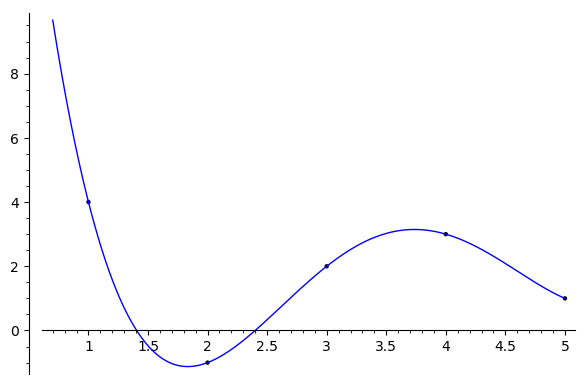

In [7]:
X = var('X')

P(X) = (3/8) * (X^4) - (65/12) * (X^3) + (217/8) * X^2 - (649/12) * X + 36


point([[1,4],[2,-1],[3,2],[4,3],[5,1]],color = 'black') + plot(P(X), (x, 0.7, 5))

# Exercice 2 : Intérpolation d'Hermite

Encore un problème où on cherche un polynôme: on cherche cette fois-ci un polynôme  $P$  de degré  $\leq 3$  pour lequel

$$P(0)=1, P′(0)=−2, P(1)=4, P′(1)=2$$
 
a) Donner une représentation matricielle de l'application $P \mapsto (P(0), P'(0), P(1), P'(1))$.

In [8]:
# f(1) = [1,0,1,0]
# f(X) = [0,1,1,1]
# f(X²) = [0,0,1,2]
# f(X³) = [0,0,1,3]

# P1(X)= 1     P1'(X)= 0
# P2(X) = X    P2'(X)= 1
# P3(X) = X^2  P3'(X)= 2X
# P4(X) = X^3  P4'(X)= 3X^2



T = Matrix([[1,0,1,0], 
           [0,1,1,1],
           [0,0,1,2],
           [0,0,1,3]])

T = transpose(T)

show(T)

[1 0 0 0]
[0 1 0 0]
[1 1 1 1]
[0 1 2 3]

b) Vérifier que votre représentation matricielle fonctionne bien en l'utilisant pour calculer l'image de   $Q(X) = X^3 + X^2 - X + 1$ et $R(X) = X^2 + 3 X$.

In [9]:
Q = Matrix([[1],[-1],[1],[1]])
R = Matrix([[0],[3],[1],[0]])



# P(Q) = [1,-1,2,4]
# P(R) = [0,3,4,5]

show(T*Q)
show(T*R)

[ 1]
[-1]
[ 2]
[ 4]

[0]
[3]
[4]
[5]

c) Montrer qu'il existe un unique polynôme de degré inférieur ou égal $ 3$  satisfaisant les conditions imposées et déterminez-le.

In [10]:
#Pour le trouver il faut faire l'inverse de la matrice, et l'inverse d'une matrice est unique. 
#Donc la solution est unique

show(det(T))
print("Le determinant de T est != 0, donc P⁻¹ existe")

Tinv = T.inverse()

Y = Matrix([[1],[-2],[4],[2]])
show("P⁻¹(1,−2,4,2)")
show(Tinv*Y)

1

Le determinant de T est != 0, donc P⁻¹ existe


'P⁻¹(1,−2,4,2)'

[ 1]
[-2]
[11]
[-6]

d) Représentez, sur une même figure, le graphe du polynôme trouvé à la question précédente, les points  $(0,1)$  et  $(1,4)$  ainsi que ses tangentes en  $x=0$  et  $x=1$  pour vérifier la cohérence de votre réponse.

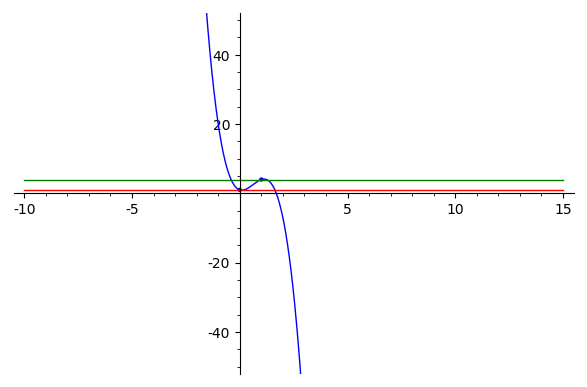

In [11]:
X = var('X')

T(X) = -6 * (X^3) + 11 * (X^2) - 2 * X + 1
O(X) = 4
I(X) = 1
point([[0,1],[1,4]]) + plot(T(X), (x, -10, 15), ymin=-50, ymax=50) + plot(O(X), (x, -10, 15), color='green', ymin=-50, ymax=50) + plot(I(X), (x, -10, 15), color='red', ymin=-50, ymax=50)